In [11]:
%pip -qqq install librosa
%pip -qqq install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import librosa
import librosa.display
import numpy as np
import warnings
import numpy as np
from matplotlib import colormaps as mcm
import matplotlib.axes as mplaxes
import matplotlib.ticker as mplticker
import matplotlib.pyplot as plt
import IPython.display as ipd

In [7]:
#load Files
debussy_file = r'C:\Users\sande\OneDrive\Documents\GitHub\ASE_practice\DataSet\sound-of-pouring-liquid-into-a-glass-hd-263175.mp3'
ipd.Audio(debussy_file) # load a local WAV file

In [8]:
debussy, sr = librosa.load(debussy_file) # load a local WAV file
debussy

array([-1.8712752e-10,  2.7891936e-10, -2.7100991e-10, ...,
       -1.5531452e-05, -2.3642155e-05,  0.0000000e+00], dtype=float32)

In [9]:
print(debussy.shape)
print(sr)
print(debussy.size)

(132830,)
22050
132830


In [12]:
sample_duration = 1/sr
print(f"Duration of a single sample is: {sample_duration:.6f} seconds")

Duration of a single sample is: 0.000045 seconds


In [13]:
#Duration of the audio file in seconds
duration = sample_duration*len(debussy)
print(f"Duration of the audio file is: {duration:.2f} seconds")

Duration of the audio file is: 6.02 seconds


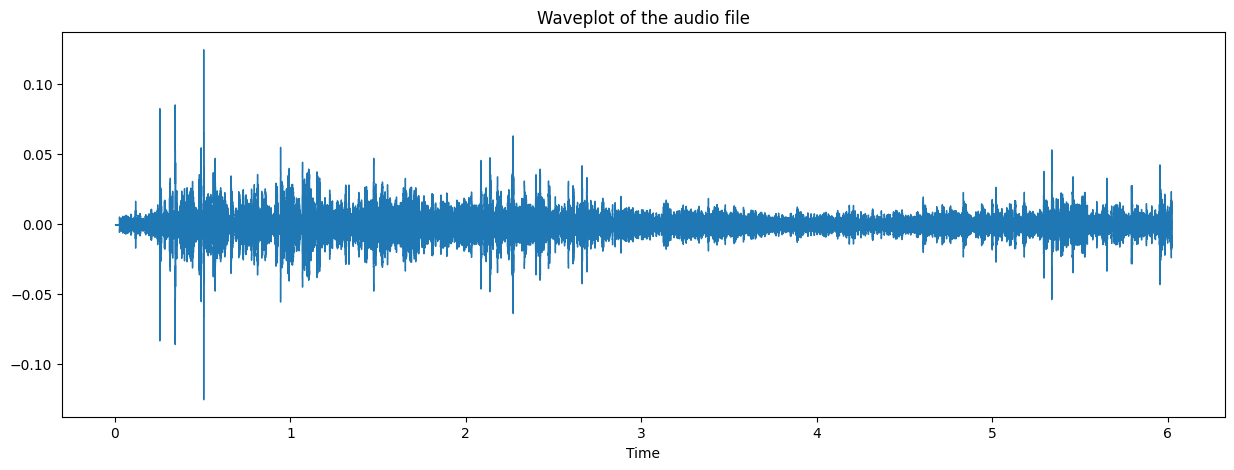

In [15]:
#visualize the audio file
plt.figure(figsize=(15, 5))
librosa.display.waveshow(debussy, sr=sr)
plt.title('Waveplot of the audio file')
plt.show()


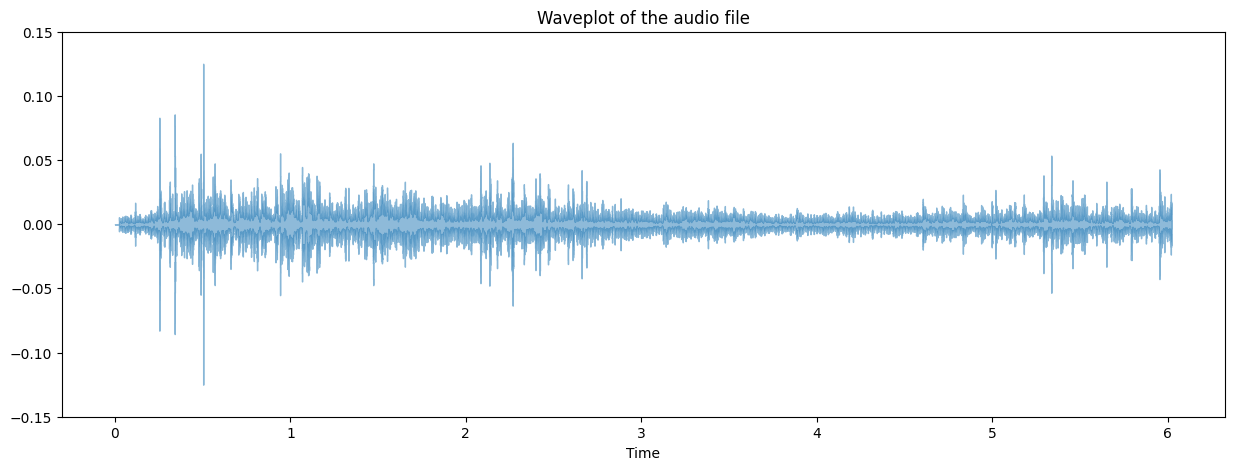

In [20]:
#visualize the audio file
plt.figure(figsize=(15, 5))
librosa.display.waveshow(debussy, sr=sr, alpha=0.5)
plt.title('Waveplot of the audio file')
plt.ylim(-0.15, 0.15)
plt.show()


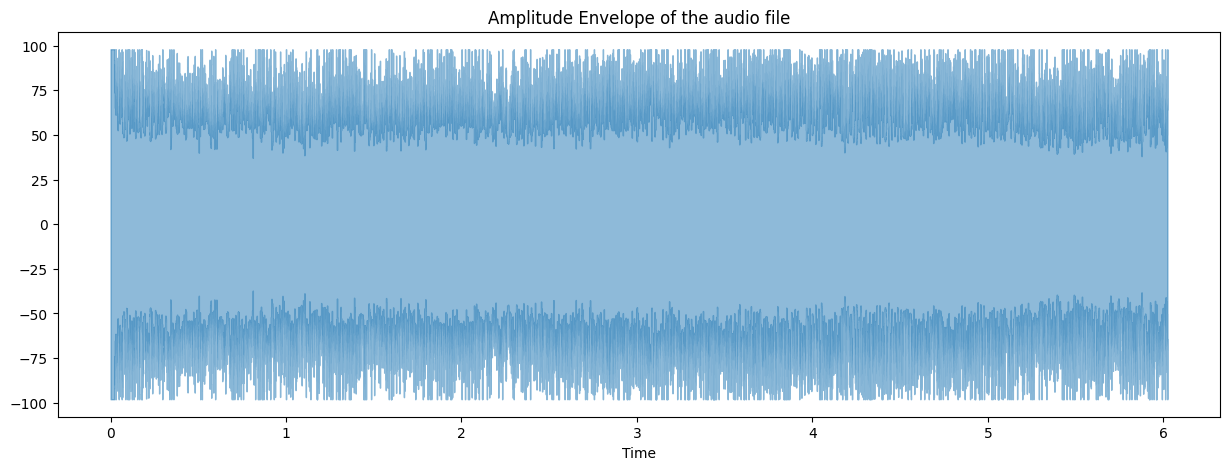

In [21]:
#calculate the amplitude envelope
amplitude_envelope = np.abs(librosa.amplitude_to_db(debussy))
plt.figure(figsize=(15, 5))
librosa.display.waveshow(amplitude_envelope, sr=sr, alpha=0.5)
plt.title('Amplitude Envelope of the audio file')
plt.show()


In [59]:
frame_size = 1024

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    #calculate the amplitude envelope for each frame
    for i in range(0, len(signal), frame_size):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)
    return np.array(amplitude_envelope)

def fancy_amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    #calculate the amplitude envelope for each frame
    for i in range(0, len(signal), hop_length):
        amplitude_envelope_current_frame = np.mean(np.abs(signal[i:i+frame_size]))
        amplitude_envelope.append(amplitude_envelope_current_frame)
    return np.array(amplitude_envelope)

In [60]:
ae_debussy = amplitude_envelope(debussy, frame_size, hop_length=512)
print(ae_debussy.shape)
print(ae_debussy)
print(len(ae_debussy))
print(ae_debussy.size)

(130,)
[0.00546856 0.00516686 0.01672973 0.00425262 0.00803843 0.08294095
 0.02099327 0.07628176 0.02646743 0.03089296 0.08025854 0.01988558
 0.03845336 0.02139474 0.03482574 0.02361288 0.02133945 0.03588049
 0.0256497  0.02722015 0.03739149 0.02847779 0.04458495 0.03671919
 0.02749097 0.03327193 0.01629675 0.015734   0.01865221 0.02306903
 0.02679433 0.02782954 0.03046525 0.01919777 0.01509038 0.0264011
 0.02650752 0.02069418 0.02215296 0.02013207 0.02259824 0.01358632
 0.01891374 0.01934871 0.04590148 0.02762935 0.03420876 0.01929117
 0.05253653 0.0159305  0.01909605 0.0326298  0.03613484 0.02395984
 0.00942084 0.03098609 0.02581593 0.03273243 0.01245992 0.01773228
 0.01019065 0.01380559 0.01190621 0.01252022 0.01069233 0.01011515
 0.00648    0.01190281 0.00877352 0.01158585 0.01272739 0.00968869
 0.00801311 0.01255559 0.00895777 0.01171809 0.007819   0.0078945
 0.0077439  0.00719606 0.00658255 0.00626536 0.00466293 0.01163112
 0.00931106 0.00509922 0.00708053 0.00627343 0.00610766 0

In [63]:
fancy_ae_debussy = fancy_amplitude_envelope(debussy, frame_size, hop_length=512)
print(fancy_ae_debussy.shape)
print(fancy_ae_debussy)
print(len(fancy_ae_debussy))
print(fancy_ae_debussy.size)

(260,)
[0.00080421 0.00170988 0.00236891 0.00237696 0.001948   0.00217926
 0.00215545 0.00251714 0.00299324 0.00509031 0.00595971 0.0039268
 0.00415458 0.00567473 0.0049144  0.00493897 0.00598813 0.00648691
 0.00594174 0.00513775 0.00700911 0.00671386 0.00518547 0.00792642
 0.0093276  0.00713026 0.00491034 0.00549154 0.00499269 0.00383758
 0.00503266 0.00498648 0.00470817 0.00595337 0.00597248 0.00593299
 0.00577116 0.00346789 0.00487619 0.00687857 0.0067808  0.00864951
 0.00912477 0.00640615 0.00537708 0.0081558  0.01193676 0.00972839
 0.00703593 0.00760946 0.00608572 0.00520705 0.00476761 0.00432381
 0.0045186  0.00464933 0.00450089 0.00386451 0.00410651 0.0041697
 0.00539478 0.00575319 0.00762158 0.00808807 0.00835307 0.00937016
 0.00659481 0.00532747 0.00487736 0.00565774 0.00709251 0.00821589
 0.00862345 0.0067993  0.0049988  0.00450084 0.00453014 0.00442474
 0.00447028 0.00528019 0.00578598 0.00495828 0.00365169 0.00381841
 0.00429687 0.00451758 0.00457557 0.00423528 0.00596704 0

In [65]:
frames = range(0, ae_debussy.size)
t = librosa.frames_to_time(frames, hop_length=512)

frames_fancy = range(0, fancy_ae_debussy.size)
t_fancy = librosa.frames_to_time(frames_fancy, hop_length=512)

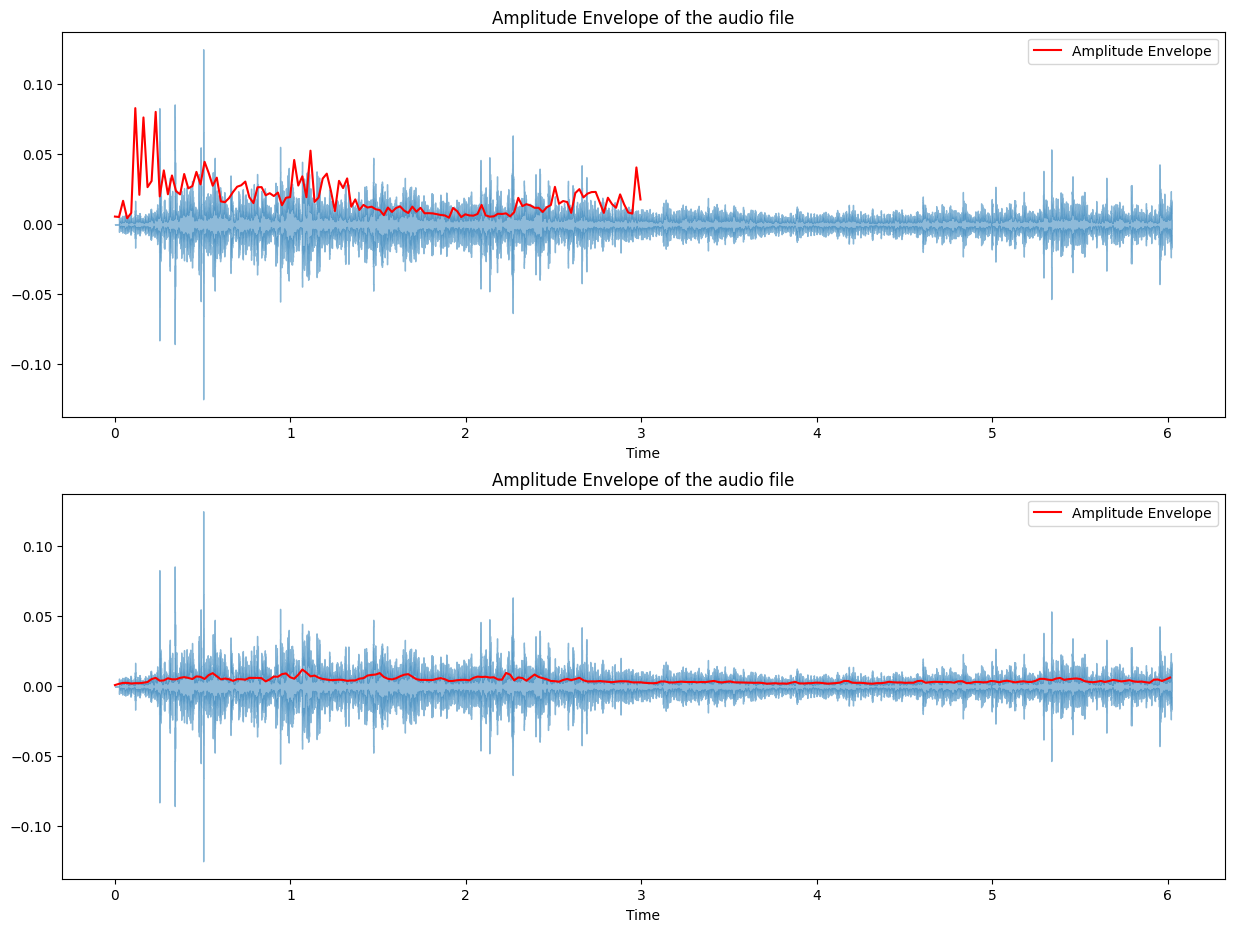

In [68]:
plt.figure(figsize=(15, 17))
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr, alpha=0.5)
plt.plot(t, ae_debussy, color="r", label='Amplitude Envelope')
plt.title('Amplitude Envelope of the audio file')
plt.legend()

plt.subplot(3, 1, 2)
librosa.display.waveshow(debussy, sr=sr, alpha=0.5)
plt.plot(t_fancy, fancy_ae_debussy, color="r", label='Amplitude Envelope')
plt.title('Amplitude Envelope of the audio file')
plt.legend()
plt.show()


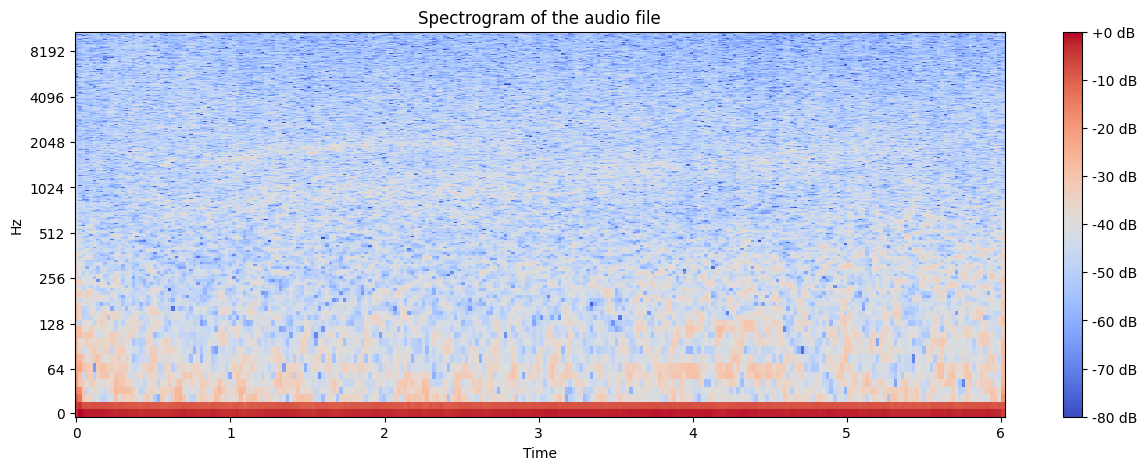

In [23]:
def plot_spectrogram(amplitude_envelope, sr, hop_length, n_fft):
    plt.figure(figsize=(15, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(amplitude_envelope, hop_length=hop_length, n_fft=n_fft)), ref=np.max)
    librosa.display.specshow(D, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of the audio file')
    plt.show()
    
hop_length = 512
n_fft = 2048
plot_spectrogram(amplitude_envelope, sr, hop_length, n_fft)
